# titanic  
https://www.kaggle.com/competitions/titanic

# 機械学習（kaggle）で学習・予測する作業フロー
1. 用意されたデータについて理解を深める
   - タイタニックの場合だと、どういった事故であったかWikipediaなどの資料を調べる
2. データの状態を調べる
   - データ量（行数）
   - データ種類（カラム数）
   - データ型（int,float,string…）
   - 欠損データ
   （pandas_profilingなどのツールを使用すると作業が効率化できる）
3. 仮説を立てる
   - 予測するデータと相関関係がありそうなデータを探索し、1つ1つ検証／可視化することで特徴量を見つける
   - 仮説から複数のデータを使って新たな特徴量を見つける。
4. 特徴量となるデータを整える（特徴量エンジニアリング）
   - 欠損値の補完
   - データ標準化
     - male/female を 0/1
     - age を 範囲でグループ化など
5. 機械学習アルゴリズムによる学習／予測
   - アルゴリズムの選定
   - ハイパーパラメータチューニング
   - Cross Validation（交差検証）
6. 適用（kaggleだとsubmit）
   - アプリに適用（どうやってやるんだろ？）
   - kaggleだとsubmitしてスコアを得る
   

In [248]:
# セットアップ
# !python -m pip install -q --upgrade pip
# !pip install -q kaggle
# !pip install -q pandas
# !pip install -q seaborn
# !pip install -q matplotlib
# !pip install -q -U scikit-learn
# !pip install -q pandas-profiling
# !pip install -q ipywidgets
# !pip install -q lightgbm
# !pip install -q optuna

In [199]:
# # データ取得（APIトークンが必要）
# !chcp 65001
# !mkdir data
# !kaggle competitions download -c titanic
# !unzip -q titanic.zip -d data
# !rm titanic.zip

In [233]:
# インポート
import pandas as pd
import numpy as np
# Profile
import pandas_profiling as pdp

# visualization
import seaborn as sb
import matplotlib.pyplot as mpl
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [201]:
# Pandasオプション設定
pd.set_option('display.max_rows', None)      # 行数の最大表示数
pd.set_option('display.max_columns', None)   # 列数の最大表示数

In [202]:
# データの取得
df_train = pd.read_csv('./data/train.csv')
df_train.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [203]:
df_test = pd.read_csv('./data/test.csv')
df_test.head(50)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Pandas Profile を使ってみる

In [231]:
df_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [205]:
# データの状態を確認
df_train.info()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [206]:
# データの行列を確認
print('df_train.shape = {} df_test.shape = {}'.format(df_train.shape, df_test.shape))

df_train.shape = (891, 12) df_test.shape = (418, 11)


データの意味

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival （生死の状態）                                  | 0 = No, 1 = Yes                                |
| pclass   | Ticket class（客室の等級）                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex  （性別）                                      |                                                |
| Age      | Age in years （年齢）                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic | 兄弟＝兄弟、姉妹、異母兄弟、異母姉妹 配偶者＝夫、妻（愛人、婚約者は無視）                                               |
| parch    | # of parents / children aboard the Titanic | 親＝父、母 子供 = 娘、息子、義理の娘、義理の息子 一部の子供は乳母と一緒に旅行したため、parch=0 です。                                               |
| ticket   | Ticket number  （チケット番号）                            |                                                |
| fare     | Passenger fare （運賃）                            |                                                |
| cabin    | Cabin number  (船室番号）                       |                                                |
| embarked | Port of Embarkation （乗船した港）                       | C = Cherbourg, Q = Queenstown, S = Southampton |


気がついたこと
- 891人の乗客情報
- 年齢の情報は714人分しかない
- 船室の情報は204しかない
- 乗船した港の情報は889人分しかない（2つ欠損している)

In [207]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


気が付いたこと
- Ticketは重複が多い（210も重複がある）
- freqは最頻値の頻度。
- 乗客の３分の２（644/889）が同じ港で登場
- 

### 乗客の生死と相関関係がありそうな項目について調査
1. 客室の等級
2. 年齢(欠損データあり)
3. 客室(欠損データ多数)
4. sbip
5. parch
6. Fare
7. cabin (204個のデータしかないので一旦スルー)
8. embarked

In [208]:
# 客室の等級
df_train.filter(['Pclass', 'Survived']).groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


確定事項
- 客室と生死には相関関係がある。（客室等級がhighクラスの方が生存率は高い）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


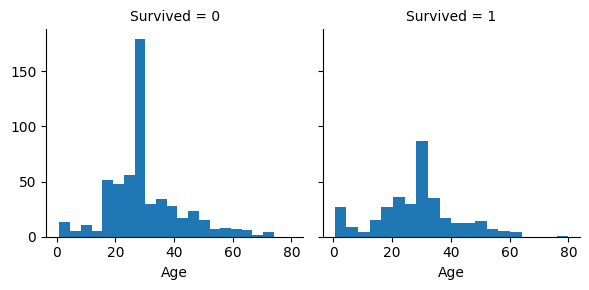

In [209]:
# 年齢
# 欠損値を埋める（平均年齢を算出し欠損値を補完する） 
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train.info()
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

# 年齢との相関関係を確認(テーブルだと確認しにくい)
df_train.filter(['Age', 'Survived']).groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False)

g = sb.FacetGrid(df_train, col='Survived')
g.map(mpl.hist, 'Age', bins=20)


In [210]:
# 年齢の分布を確認
bins = list(range(0,80,5))   
pd.cut(df_train['Age'], bins).value_counts().sort_index()

(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    285
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
Name: Age, dtype: int64

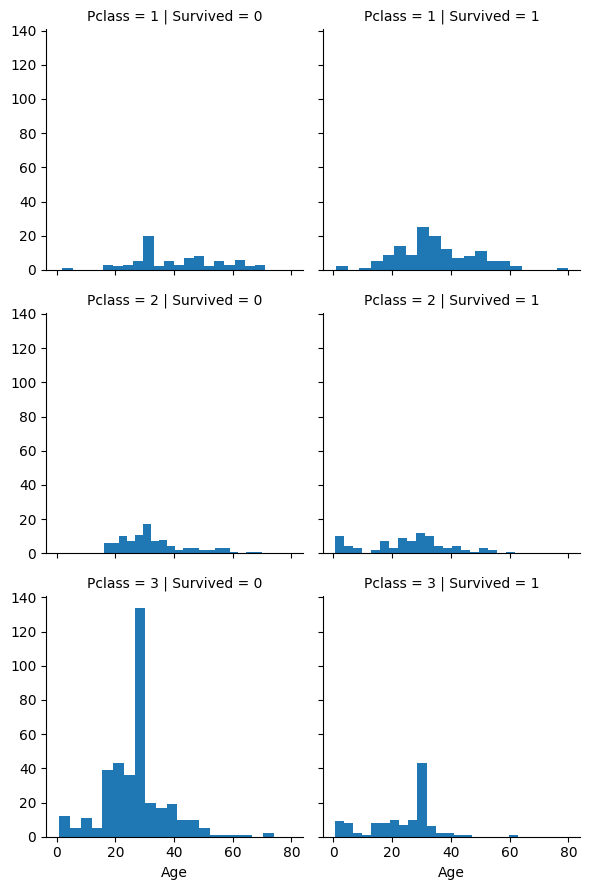

In [211]:
# 客室の等級と死亡率の関係を確認
df_train.filter(['Pclass', 'Survived']).groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

g = sb.FacetGrid(df_train, row='Pclass' , col='Survived')
g.map(mpl.hist, 'Age', bins=20)

決定事項
- 年齢と生存率に相関関係はある。20歳後半の死亡者数が多い。
- 客室の等級３（Pclass = 3） の男性（20歳後半）の死亡者数が多い。

In [212]:
# sibsp: 乗船している兄弟、配偶者の数
df_train.filter(['SibSp', 'Survived']).groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=False)


,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


In [213]:
# parch: 乗船している親、子供の数
df_train.filter(['Parch', 'Survived']).groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=False)

,Parch,Survived
6,6,0.000000
5,5,0.200000
4,4,0.000000
3,3,0.600000
2,2,0.500000
1,1,0.550847
0,0,0.343658


決定事項
- 兄弟、配偶者が１人の場合、生存確率が高い。おそらく配偶者がいる乗客の生存者が多いと考えられる
- 親、子供の数が１～３人の場合、生存確率が高い。おそらく子供から見た両親、親から見た子供がいる場合に生存確率が高くなる。

よって、家族で乗船した場合に生存確率が高いと考えられる。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


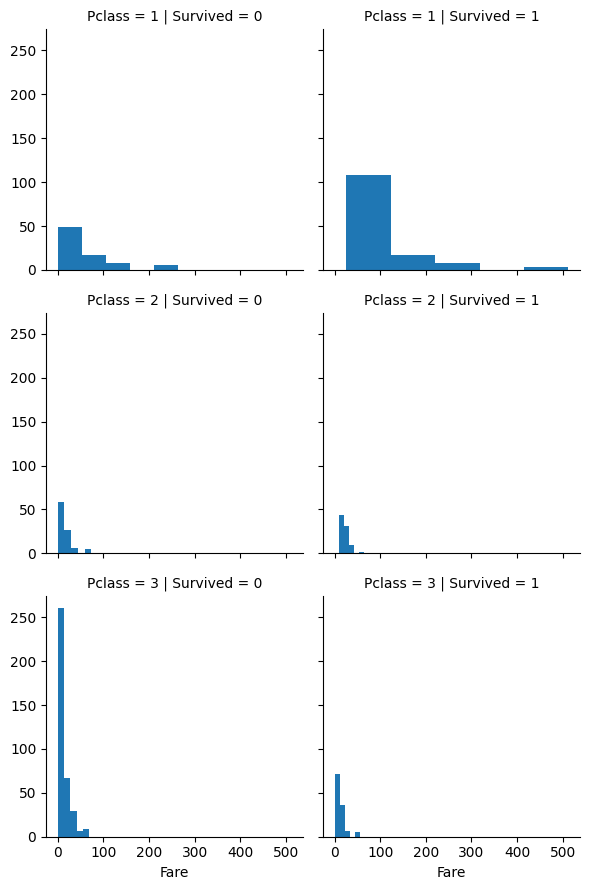

In [214]:
# 運賃との関係を確認
df_train.filter(['Fare', 'Survived']).groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=False)

g = sb.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(mpl.hist, 'Fare', bins=5)

# 運賃の欠損データを中央値で補完(testデータ)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test.info()

決定事項
- Pclass=1では運賃が高いほうが生存確率が高い。

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


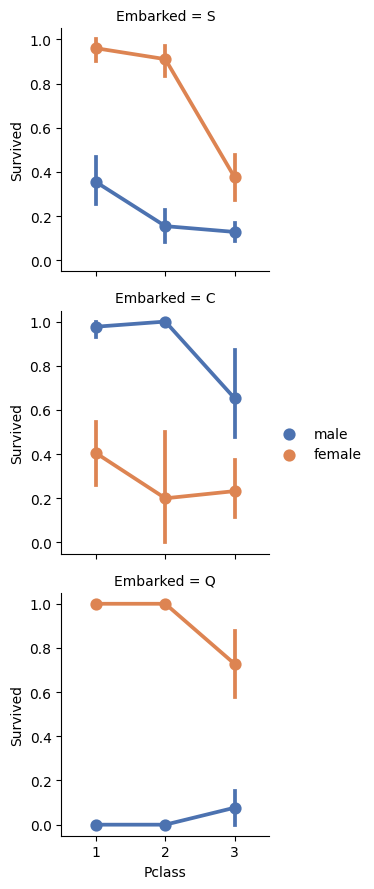

In [215]:
# embarkedとの関係を確認

# ２つの欠損データを補完
df_train['Embarked'].groupby(df_train['Embarked']).count()
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# embarkedとの関係を確認
df_train.filter(['Embarked', 'Survived']).groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=False)

g = sb.FacetGrid(df_train,  row='Embarked')
g.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


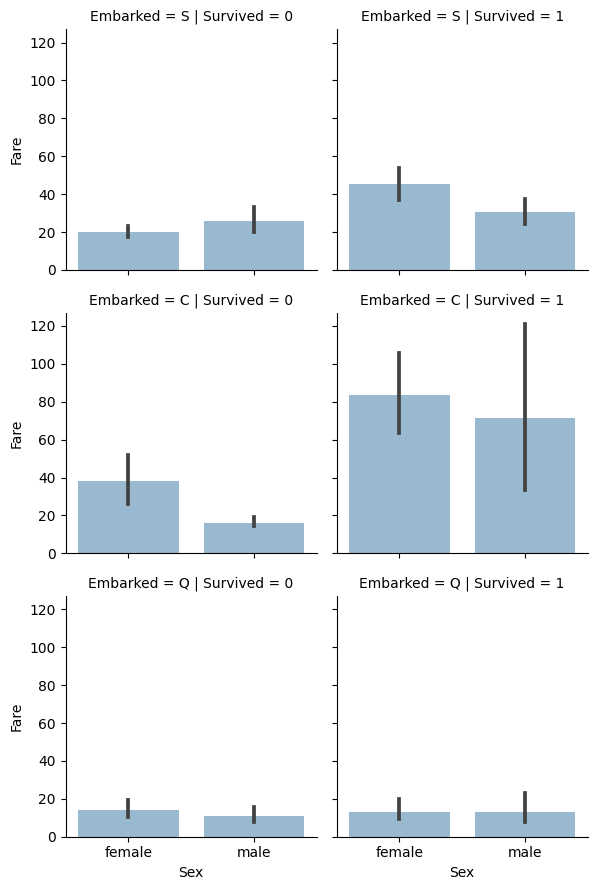

In [216]:
g = sb.FacetGrid(df_train, row='Embarked', col='Survived')
g.map(sb.barplot, 'Sex', 'Fare', alpha=.5,)
g.add_legend()

決定事項
- Cから乗船した男性(male)は生存確率が高い。

# これまでの考察からデータを整理する
- train.csv と test.csv から ticket と chabin は不要なのでデータセットから削除する。
- Stringを数値に変換する
  - male/female を 0/1 にする
  - 名前から称号（title）を抽出する

In [217]:
print('[削除前] df_train.shape = {}  df_test.shape = {}'.format(df_train.shape, df_test.shape))
df_train.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
print('[削除後] df_train.shape = {}  df_test.shape = {}'.format(df_train.shape, df_test.shape))

[削除前] df_train.shape = (891, 12)  df_test.shape = (418, 11)
[削除後] df_train.shape = (891, 10)  df_test.shape = (418, 9)


In [218]:
# male/femaleを数値に変換
df_list = [df_train, df_test]
for df in df_list:
  df['Sex'] = df['Sex'].map({'male': 0,'female': 1}).astype(int)

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [219]:
# 名前から称号を抽出する
for df in df_list:
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex']).sort_values(by=[0,1])

Sex,0,1
Title,,
Countess,0,1
Lady,0,1
Mme,0,1
Ms,0,1
Mlle,0,2
Mrs,0,125
Miss,0,182
Capt,1,0
Don,1,0


In [220]:
# Embarked を 数値化
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

# 特徴量を持つデータのみ残す
df_train = df_train.drop(['Name','Ticket','Title'], axis=1)
df_test = df_test.drop(['Name','Ticket','Title'], axis=1)

# 学習データ(X_train,y_train)の作成
X_train（'Survived'なし）と y_train('Surbived'のみ)を 作成する

In [221]:
# 毎回実行するのが面倒なのでディープコピーしたものを使う
X_train = df_train.drop('Survived', axis=1).copy()
y_train = df_train['Survived'].copy()
X_test = df_test.copy()

## 学習・予測
### ロジスティック回帰

In [227]:
# ロジスティック回帰のアルゴリズムを使用して学習・予測
clf = LogisticRegression(penalty='l2', solver='sag')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [228]:
# ロジスティック回帰の submit CSVを作成
sub = pd.read_csv('./data/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('./data/logistic_regression_submission.csv', index=False)

### ランダムフォレスト

In [229]:
# ランダムフォレスト を使用して学習・予測
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [230]:
# ランダムフォレストの submit CSVを作成
sub = pd.read_csv('./data/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('./data/random_forest_classifier_submission.csv', index=False)

# LightGBM を使用して学習・予測

In [235]:
# トレーニングデータを分割
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [244]:
# カテゴリ変数を設定
categorical_features = ['Embarked', 'Pclass', 'Sex']

import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categorical_features)

params = {
  'objective' : 'binary'
}

model = lgb.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)
# LightGBMの出力結果は0～1の連続値。0.5より大きいものを1とする
y_pred = (y_pred > 0.5).astype(int)
print(y_pred)



[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Ov

In [245]:
# LighitGBM の submit CSVを作成
sub = pd.read_csv('./data/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('./data/light_gbm_submission.csv', index=False)

# ligthGBMのハイパーパラメータをOptunaを使って調整する

In [258]:
import optuna
from sklearn.metrics import log_loss

def objective(trial):
  params = {
    'objective': 'binary',
    'max_bin': trial.suggest_int('max_bin', 255, 500), # 範囲指定
    'learning_rate': 0.05,
    'num_leaves': trial.suggest_int('num_leaves', 32, 128), # 範囲指定
  }

  lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

  model = lgb.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10)

  y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
  score = log_loss(y_valid, y_pred_valid)
  return score

study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)


[I 2023-01-04 22:05:14,640] A new study created in memory with name: no-name-42161227-0ad1-4f78-bb99-47f208418359
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Ov

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2023-01-04 22:05:15,053] Trial 13 finished with value: 0.4417256559496044 and parameters: {'max_bin': 290, 'num_leaves': 123}. Best is trial 0 with value: 0.4417256559496044.
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	training's binary_logloss: 0.318076	valid_1's binary_logloss: 0.442894
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Ov

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Ov

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Ov

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [261]:

print('-'*40)
print('  < ベストなハイパーパラメータ >  ')
print('-'*40)
print(study.best_params)
print('-'*40)

----------------------------------------
  < ベストなハイパーパラメータ >  
----------------------------------------
{'max_bin': 390, 'num_leaves': 101}
----------------------------------------


In [263]:
import optuna
from sklearn.metrics import log_loss

def objective(trial):
  params = {
    'objective': 'binary',
    'max_bin': study.best_params['max_bin'], # optunaの結果
    'learning_rate': 0.05,
    'num_leaves': study.best_params['num_leaves'],  # optunaの結果
  }

  lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

  model = lgb.train(params, lgb_train,
                  valid_sets=[lgb_train, lgb_eval],
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10)

  y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [264]:
# LighitGBM(optunaパラメタ適用後) の submit CSVを作成
sub = pd.read_csv('./data/gender_submission.csv')
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('./data/optuna_light_gbm_submission.csv', index=False)